In [1]:
import os

industries_path = "../data/fwdindustries/"

files = [ industries_path + i for i in os.listdir(industries_path) if i.endswith("xlsx")]

Get a list of industries

In [2]:
import pandas as pd

industries = []

for f in files:
    data = pd.read_excel(f, sheet_name="Overview")
    industries.append(data.iloc[14,1])
#     break

print(industries)

['Accounting', 'Automotive', 'Computer Software', 'Construction', 'Education Management', 'Financial Services', 'Higher Education', 'Hospital & Health Care', 'Information Technology & Services', 'Retail']


In [3]:
import pandas as pd

li = []

for f in files:
    data = pd.read_excel(f, sheet_name="Industries")
    li.append(data)
    
df = pd.concat(li, axis=0, ignore_index=True)
display( df )

df.to_csv("../data/Industries.csv",index = False)

,Industry,Professionals,1y growth,Job posts,Hiring demand,Female,Male,Gender gap,Compensation
0,Accounting,29453,0.046920,2518,Very high,40%,60%,20%,0
1,Automotive,85243,0.008650,4086,Very high,21%,79%,58%,88700
2,Computer Software,217643,0.036672,10669,Very high,25%,75%,50%,0
3,Construction,86345,0.015000,3755,High,18%,82%,64%,0
4,Education Management,109839,0.005714,2426,High,49%,51%,2%,0
5,Financial Services,222182,0.025994,7708,Very high,33%,67%,34%,93100
6,Higher Education,210748,-0.002778,4950,Very high,38%,62%,24%,70400
7,Hospital & Health Care,332532,0.014349,11583,Very high,46%,54%,8%,78400
8,Information Technology & Services,724647,0.015249,65140,Very high,22%,78%,56%,0
9,Retail,123249,0.002041,9086,Very high,36%,64%,28%,0


In [4]:
df["Percentage of Professionals"] = df["Job posts"] / df["Professionals"]
display(df[["Industry","Job posts","Percentage of Professionals"]])

,Industry,Job posts,Percentage of Professionals
0,Accounting,2518,0.085492
1,Automotive,4086,0.047934
2,Computer Software,10669,0.049021
3,Construction,3755,0.043488
4,Education Management,2426,0.022087
5,Financial Services,7708,0.034692
6,Higher Education,4950,0.023488
7,Hospital & Health Care,11583,0.034833
8,Information Technology & Services,65140,0.089892
9,Retail,9086,0.073721


In [5]:
import pandas as pd
import os

li = []

for f in files:
    data = pd.read_excel(f, sheet_name="Common Titles")
    li.append(data)
    
JobTitles = pd.concat(li, axis=0, ignore_index=True)


df = JobTitles.groupby(['Titles'])['Professionals'].sum().reset_index()
df["pct_professionals"] = df.Professionals / sum(df.Professionals)

df.sort_values(by=['Professionals'], ascending=False).head(15)

df.to_csv("../data/jobs_counts.csv", index=False)

In [6]:
import pandas as pd
import os

li = []

for i, f in enumerate(files):
    data = pd.read_excel(f, sheet_name="Industry Movements")
    data["From_Industry"] = industries[i]
    li.append(data)
    
InudstryMovements = pd.concat(li, axis=0, ignore_index=True)

InudstryMovements.to_csv("../data/InudstryMovements.csv",index = False)

InudstryMovements.head()

,Industry,From selected industry*,To selected industry*,Ratio,Net change,From_Industry
0,Information Technology & Services,199,386,1.939698,187,Accounting
1,Financial Services,201,205,1.019900,4,Accounting
2,Higher Education,36,238,6.611111,202,Accounting
3,Management Consulting,115,142,1.234783,27,Accounting
4,Computer Software,100,116,1.160000,16,Accounting


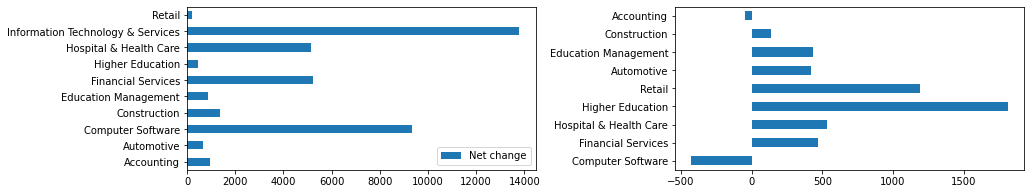

In [7]:
import matplotlib.pyplot as plt

df = InudstryMovements.groupby(['From_Industry'])[["From selected industry*", "To selected industry*"]].sum().reset_index()
                                                   
df["Net change"] = df["To selected industry*"] - df["From selected industry*"] 

fig, ax = plt.subplots(1,2,figsize=(15, 3))
plt.subplots_adjust(wspace = .4) #bottom=0.1, right=0.8, top=0.9, 
df.plot.barh(x="From_Industry", y="Net change", ax=ax[0])
# ax[0].legend().set_visible(False)
ax[0].yaxis.label.set_visible(False)
    
df = InudstryMovements.loc[InudstryMovements.From_Industry=="Information Technology & Services",:]
df = df.loc[df.Industry.isin(industries),:]

df.plot.barh(x="Industry", y="Net change", ax=ax[1])
ax[1].legend().set_visible(False)
ax[1].yaxis.label.set_visible(False)



In [8]:
import pandas as pd
import os

li = []

for f in files:
    data = pd.read_excel(f, sheet_name="Degrees")
    li.append(data)
    
Degrees = pd.concat(li, axis=0, ignore_index=True)

df = Degrees.groupby(['Unnamed: 0'])['Total professionals'].mean().reset_index()


df.to_csv("../data/degrees.csv", index=False)

display(df)

,Unnamed: 0,Total professionals
0,Associate's Degree,0.112558
1,Bachelor's Degree,0.569422
2,Doctor of Philosophy,0.025788
3,Master of Business Administration,0.085548
4,Master's Degree,0.206684


In [9]:
import pandas as pd
import os

li = []

for f in files:
    data = pd.read_excel(f, sheet_name="Growing Skills")
    li.append(data)
    
GrowingSkills = pd.concat(li, axis=0, ignore_index=True)

df = GrowingSkills.groupby(['Skills'])['1y growth'].sum().reset_index()

# df["pct"] = df.Professionals / df.Professionals.sum()

df.to_csv("../data/growing_skills.csv", index=False)

display(df.sort_values(by=['1y growth'], ascending=False).head(15))


,Skills,1y growth
201,Python (Programming Language),2.952212
17,Analytics,1.796168
67,Data Analysis,1.767715
131,Information Technology,1.594396
142,JavaScript,1.313521
65,Customer Satisfaction,1.249412
141,Java,1.231813
87,Engineering,1.157312
96,Finance,1.109210
217,SQL,1.082198
